<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
#ваш код здесь
df = pd.read_csv("dst-3.0_16_1_hh_database.csv", sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
#ваш код здесь
first_few_rows = df.head()
last_few_rows = df.tail()

first_few_rows, last_few_rows

(                                   Пол, возраст           ЗП  \
 0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
 1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
 2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
 3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
 4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   
 
                            Ищет работу на должность:  \
 0                            Системный администратор   
 1                               Технический писатель   
 2                                           Оператор   
 3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
 4                  Региональный менеджер по продажам   
 
                         Город, переезд, командировки  \
 0  Советск (Калининградская область) , не готов к...   
 1  Королев , не готов к переезду , готов к редким...   
 2  Тверь , не готова к переезду , не готова к ком...   
 3  Саратов , не готов к переезду , 

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [4]:
#ваш код здесь
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [5]:
#ваш код здесь
df.describe(include='all')

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [6]:
#ваш код здесь
def extract_education_level(text):
    words = text.split()
    # Извлекаем первые два слова, поскольку уровень образования гарантированно содержится в первых двух словах
    education_level = " ".join(words[:2])

    # Mapping the extracted education level to one of the four categories
    if education_level.startswith('Высшее'):
        return 'высшее'
    elif education_level.startswith('Неоконченное высшее'):
        return 'неоконченное высшее'
    elif education_level.startswith('Среднее специальное'):
        return 'среднее специальное'
    elif education_level.startswith('Среднее'):
        return 'среднее'
    else:
        return 'неопределено'

# Применение функции к столбцу
df['Образование'] = df['Образование и ВУЗ'].apply(extract_education_level)

# Уникальные значения столбца 'Образование'
unique_education_levels = df['Образование'].unique()

# Удаляем оригинальный столбец
df.drop('Образование и ВУЗ', axis=1, inplace=True)

# Проверка
print(unique_education_levels)
df[['Образование']].head()

['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']


,Образование
0,неоконченное высшее
1,высшее
2,среднее специальное
3,высшее
4,высшее


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [7]:
#ваш код здесь
# Разбиваем столбец на 'Пол', 'Возраст'
def extract_gender_age(text):
    parts = text.split(' , ')
    gender = 'М' if parts[0] == 'Мужчина' else 'Ж'
    age = int(parts[1].split()[0])
    return gender, age


# Применение функции к столбцу
df['Пол'], df['Возраст'] = zip(*df['Пол, возраст'].apply(extract_gender_age))

# Удаляем оригинальный столбец
df.drop('Пол, возраст', axis=1, inplace=True)

# Проверки
unique_genders = df['Пол'].unique()
unique_ages = df['Возраст'].unique()
print(unique_genders, sorted(unique_ages), sep='\n')
df[['Пол', 'Возраст']].head()

['М' 'Ж']
[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 76, 77, 100]


,Пол,Возраст
0,М,39
1,М,60
2,Ж,36
3,М,38
4,Ж,26


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [8]:
#ваш код здесь

import re


# Преобразование "Опыт работы" в количество месяцев
def experience_to_months(exp_str):
    if pd.isna(exp_str) or exp_str == 'Не указано':
        return np.nan
    exp_str = exp_str.split('  ')[0] # Убираем лишнее по двойному пробелу
    # Используем регулярные выражения
    years = months = 0
    years_match = re.search(r'(\d+)\s+(?:год|лет)', exp_str)
    if years_match:
        years = int(years_match.group(1))

    months_match = re.search(r'(\d+)\s+месяц', exp_str)
    if months_match:
        months = int(months_match.group(1))

    total_months = years * 12 + months
    return total_months

# Применение функции к столбцу "Опыт работы"
df['Опыт работы (месяц)'] = df['Опыт работы'].apply(experience_to_months)

# Удаляем оригинальный столбец
#df.drop('Опыт работы', axis=1, inplace=True)

# Проверка
df[['Опыт работы (месяц)']].head()

,Опыт работы (месяц)
0,202.0
1,233.0
2,123.0
3,225.0
4,67.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [9]:
#ваш код здесь

# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 
                  'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 
                  'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

# Определения категории города
def city(city):
    if city in ['Москва', 'Санкт-Петербург']:
        return city
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

# Определения готовности к переезду
def relocate(text):
    if 'не готов к переезду' in text or 'не готова к переезду' in text:
        return False
    elif 'готов к переезду' in text or 'готова к переезду' in text or 'хочу переехать' in text:
        return True
    else:
        return False  # Если информация отсутствует, считаем что соискатель не готов к переезду

# Определения готовности к командировкам
def trip(text):
    if 'не готов к командировкам' in text or 'не готова к командировкам' in text:
        return False
    elif 'готов к командировкам' in text or 'готова к командировкам' in text or 'готов к редким командировкам' in text or 'готова к редким командировкам' in text:
        return True
    else:
        return False  # Если информация отсутствует, считаем что соискатель не готов к командировкам

# Применение функций к датафрейму
df['Город'] = df['Город, переезд, командировки'].apply(lambda x: city(x.split(',')[0].strip()))
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(relocate)
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(trip)

# Удаляем оригинальный столбец
df.drop('Город, переезд, командировки', axis=1, inplace=True)

# Проверка
df[['Город', 'Готовность к переезду', 'Готовность к командировкам']].head()

,Город,Готовность к переезду,Готовность к командировкам
0,другие,False,False
1,другие,False,True
2,другие,False,False
3,другие,False,True
4,Москва,False,True


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [10]:
#ваш код здесь

# Категории
employment_categories = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
schedule_categories = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

# One Hot Encoding
def one_hot_encoding(df, column, categories):
    for category in categories:
        df[category] = df[column].apply(lambda x: category in x)

# Применяем one_hot_encoding к 'Занятость' и 'График'
one_hot_encoding(df, 'Занятость', employment_categories)
one_hot_encoding(df, 'График', schedule_categories)

# Удаляем оригиналы 'Занятость' и 'График'
df.drop(['Занятость', 'График'], axis=1, inplace=True)

# Проверка
df[[
    'полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка',
    'полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод'
]].head()

,полная занятость,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод
0,True,True,True,False,False,True,True,True,True,True
1,True,True,True,False,False,True,True,True,True,False
2,True,False,False,False,False,True,False,False,False,False
3,True,True,True,False,False,False,False,True,True,False
4,True,False,False,False,False,True,False,False,False,False


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [11]:
#ваш код здесь

# Разбиваем "ЗП" на число и валюту
df['ЗП(число)'], df['Валюта'] = df['ЗП'].str.split(' ', expand=True)[0], df['ЗП'].str.split(' ', expand=True)[1]


er_df = pd.read_csv('ExchangeRates.csv')

# Таблица для перевода в стандарт ISO
currency_to_iso = {
    'руб.': 'RUB',
    'грн.': 'UAH',
    'USD': 'USD',
    'EUR': 'EUR', 
    'бел.руб.': 'BYN',
    'KGS': 'KGS', 
    'сум': 'UZS',
    'AZN': 'AZN',
    'KZT': 'KZT'
}

# Переводим валюту в ISO
df['Валюта'] = df['Валюта'].map(currency_to_iso)



In [12]:
# Преобразование столбца "Обновление резюме" в формат datetime и выделение только даты
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], dayfirst=True).dt.date

# Преобразование столбца date в таблице валют в формат datetime и выделение только даты
er_df['date'] = pd.to_datetime(er_df['date'], dayfirst=True).dt.date

merged_data = pd.merge(df, er_df, left_on=['Обновление резюме', 'Валюта'], right_on=['date', 'currency'], how='left')
merged_data['close'].fillna(1, inplace=True)
merged_data['proportion'].fillna(1, inplace=True)


merged_data['ЗП (руб)'] = merged_data['ЗП(число)'].astype(int) * merged_data['close'] / merged_data['proportion']

merged_data.drop(['ЗП', 'ЗП(число)', 'Валюта', 'currency', 'per', 'date', 'time', 'vol', 'proportion', 'close'], axis=1, inplace=True)
merged_data[['ЗП (руб)']].head(148)

df = merged_data

C:\Users\Grishin\AppData\Local\Temp\ipykernel_6648\1755469524.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  er_df['date'] = pd.to_datetime(er_df['date'], dayfirst=True).dt.date


In [13]:
df.to_csv('aboba.csv', sep=';')

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: 
    - чему равна мода распределения, 
    - каковы предельные значения признака, 
    - в каком примерном интервале находится возраст большинства соискателей? 
    - Есть ли аномалии для признака возраста, 
    - какие значения вы бы причислили к их числу?

*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

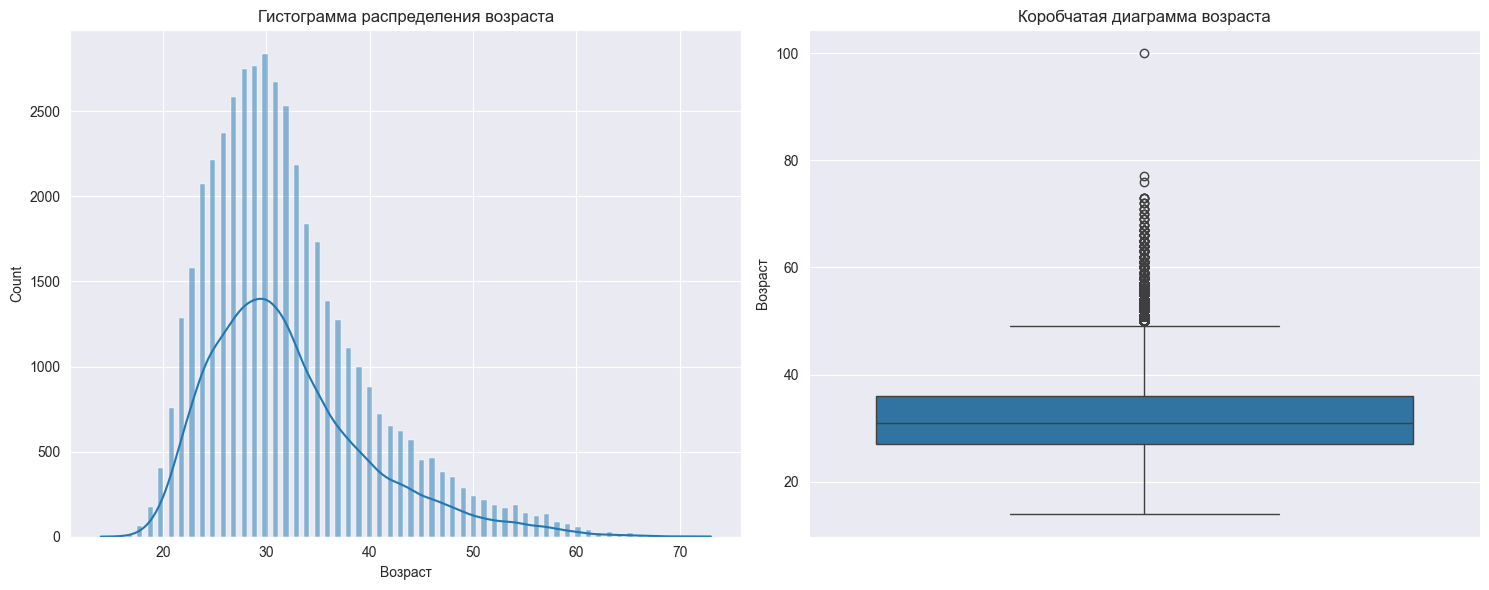

(count    44744.000000
 mean        32.196741
 std          7.929800
 min         14.000000
 25%         27.000000
 50%         31.000000
 75%         36.000000
 max        100.000000
 Name: Возраст, dtype: float64,
 30)

In [14]:
# ваш код здесь

# Анализ распределения возраста
age_data = df['Возраст']

# Построение гистограммы и коробчатой диаграммы для возраста
plt.figure(figsize=(15, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(age_data[age_data<75], kde=True)
plt.title('Гистограмма распределения возраста')

# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(y=age_data)
plt.title('Коробчатая диаграмма возраста')

plt.tight_layout()
plt.show()

# Основные статистические показатели
age_statistics = age_data.describe(include="all")
age_mode = age_data.mode()[0]

age_statistics, age_mode


In [15]:
# Ответы на вопросы

# 1. Мода распределения
mode_age = age_data.mode()[0]

percentile_25 = 27
percentile_75 = 36

# 4. Аномалии
# Возрастные аномалии могут быть определены как значения за пределами 1.5*IQR от 25-го и 75-го процентилей
IQR = percentile_75 - percentile_25
lower_bound = percentile_25 - 1.5 * IQR
upper_bound = percentile_75 + 1.5 * IQR

mode_age, lower_bound, upper_bound

(30, 13.5, 49.5)

ваши выводы здесь

Ответы на вопросы:
1. Мода распределения опыта работы: 30
2. Минимальный возраст: 14, Максимальный: 100
3. Примерный интервал возраста большинства соискателей: от 27 до 36
4. Аномальные значения возраста: ниже 13.5 и выше 49.5

Если рассматривать эта данные и гистограмму с точки зрения логики и законодательства. Можно сделать вывод, что нижняя граница соответствует закону, а верхняя (при использовании IQR) не логична, как минимум, потому что пенсионный возраст в РФ в промежутке 56-62 года, а так же многие люди продолжают работать и после. Точно можно сказать, что соискатели которым ~100 лет можно считать аномалией.


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: 
    - чему равна мода распределения, 
    - каковы предельные значения признака, 
    - в каком примерном интервале находится опыт работы большинства соискателей? 
    - Есть ли аномалии для признака опыта работы, 
    - какие значения вы бы причислили к их числу?

*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

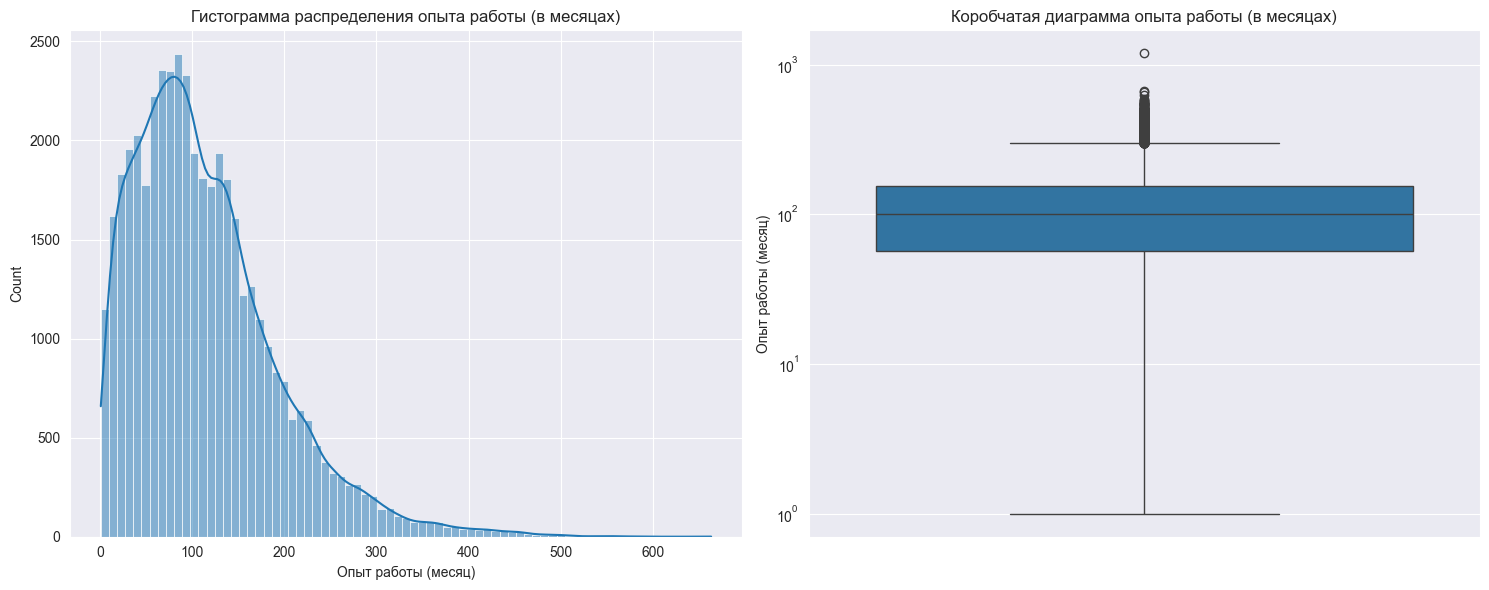

(count    44574.000000
 mean       114.418944
 std         79.047861
 min          1.000000
 25%         57.000000
 50%        100.000000
 75%        154.000000
 max       1188.000000
 Name: Опыт работы (месяц), dtype: float64,
 81.0)

In [16]:
# ваш код здесь

# Анализ распределения признака "Опыт работы (месяц)"
experience_data = df['Опыт работы (месяц)']

# Построение гистограммы и коробчатой диаграммы для опыта работы
plt.figure(figsize=(15, 6))

# Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(experience_data[experience_data<1000], kde=True, bins=75)
plt.title('Гистограмма распределения опыта работы (в месяцах)')


# Коробчатая диаграмма
plt.subplot(1, 2, 2)
sns.boxplot(y=experience_data)
plt.yscale('log')
plt.title('Коробчатая диаграмма опыта работы (в месяцах)')

plt.tight_layout()
plt.show()

# Основные статистические показатели
experience_statistics = experience_data.describe(include="all")
experience_mode = experience_data.mode()[0]

experience_statistics, experience_mode


In [17]:
# 1. Мода распределения
mode_experience = experience_data.mode()[0]

percentile_25 = 57
percentile_75 =  155

# Аномалии
IQR = percentile_75 - percentile_25
lower_bound = percentile_25 - 1.5 * IQR
upper_bound = percentile_75 + 1.5 * IQR

mode_experience, lower_bound, upper_bound

(81.0, -90.0, 302.0)

ваши выводы здесь

Ответы на вопросы:
1. Мода распределения опыта работы: 81.0 мес.
2. Минимальный опыт работы: 1 мес. , Максимальный опыт работы: 24230 мес.
3. Примерный интервал опыта работы большинства соискателей: от 57 до 155 мес.
4. Аномальные значения опыта работы: ниже -90.0 мес. и выше 302.0 мес.

Пояснение к "-90 месяцев". 
Отрицательное значение для нижней границы не имеет практического смысла в контексте опыта работы, так как опыт работы не может быть отрицательным. 
Это указывает на то, что в этом наборе данных маловероятно наличие аномально низких значений опыта работы.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: 
    - каковы предельные значения признака, 
    - в каком примерном интервале находится заработная плата большинства соискателей? 
    - Есть ли аномалии для признака возраста? 
    - Обратите внимание на гигантские размеры желаемой заработной платы.

*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


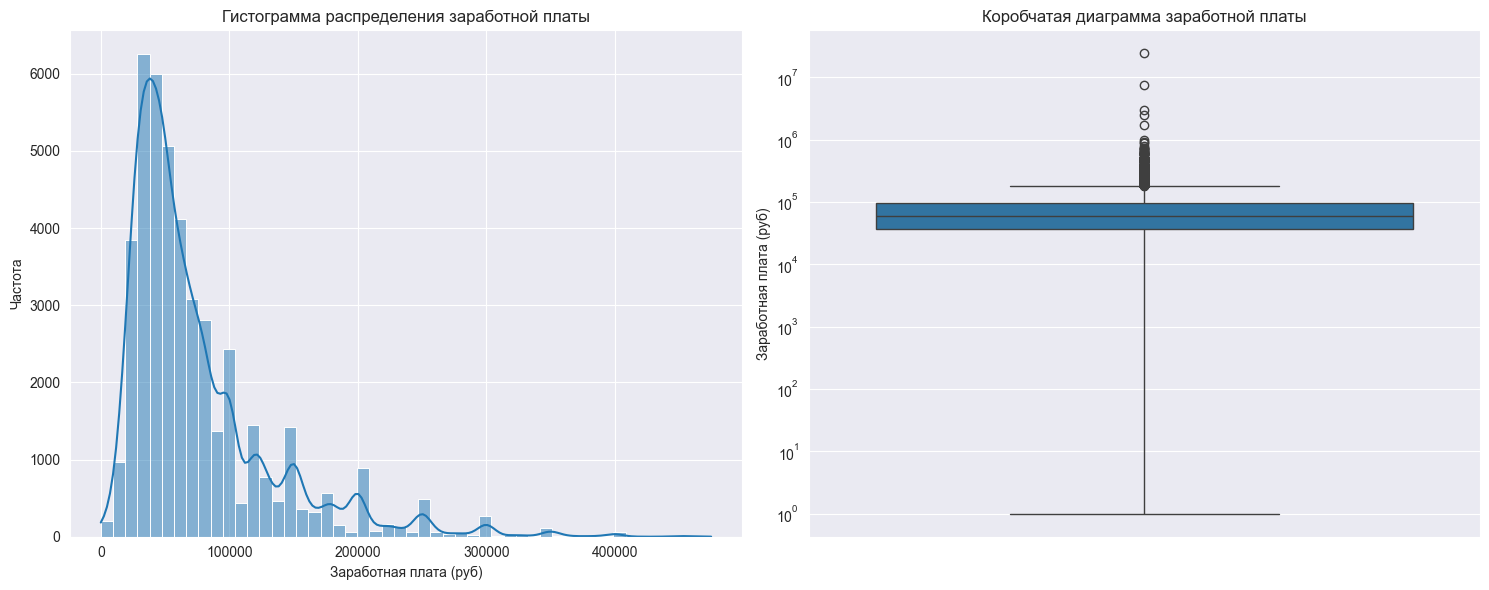

count    4.474400e+04
mean     7.653354e+04
std      1.359315e+05
min      1.000000e+00
25%      3.708220e+04
50%      5.901900e+04
75%      9.500000e+04
max      2.430488e+07
Name: ЗП (руб), dtype: float64

In [18]:
# ваш код здесь

# Анализ распределения признака "ЗП (руб)"
salary_data = df['ЗП (руб)']

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(salary_data[salary_data<500000], kde=True,  bins=50)

plt.xlabel("Заработная плата (руб)")
plt.ylabel("Частота")
plt.title('Гистограмма распределения заработной платы')

plt.subplot(1, 2, 2)
sns.boxplot(y=salary_data)
plt.yscale('log')
plt.ylabel("Заработная плата (руб)")
plt.title('Коробчатая диаграмма заработной платы')

plt.tight_layout()
plt.show()

salary_statistics = salary_data.describe(include="all")
salary_statistics


In [19]:
percentile_25 = salary_data.quantile(0.25)
percentile_75 = salary_data.quantile(0.75)

# Аномалии
IQR = percentile_75 - percentile_25
lower_bound = percentile_25 - 1.5 * IQR
upper_bound = percentile_75 + 1.5 * IQR

lower_bound, upper_bound, salary_data.max(), percentile_25, percentile_75

(-49794.500000000015, 181876.7, 24304876.0, 37082.2, 95000.0)

ваши выводы здесь

Ответы на вопросы:
1. Минимальная ЗП: 1 руб. , Максимальная ЗП: 24304876 руб.
2. Примерный интервал ЗП большинства соискателей: от 37082 до 95000 руб.
3. Да. Аномалии Есть!
4. Аномальные значения опыта работы: ниже -49794.5 и выше 181876.7 руб.

Отрицательное значение на нижнем пороге указывает на то, что маловероятно наличие аномально низких значений опыта работы.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

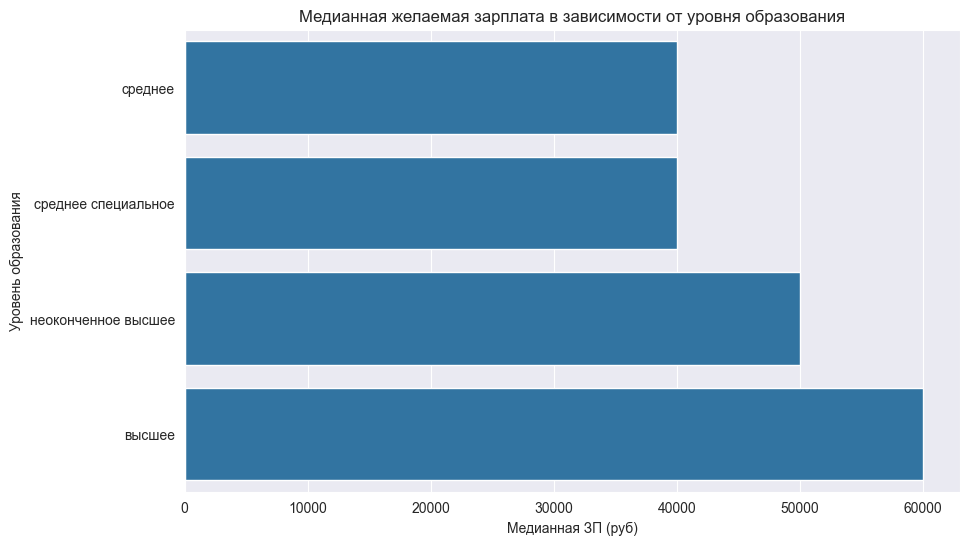

Образование
среднее                40000.0
среднее специальное    40000.0
неоконченное высшее    50000.0
высшее                 60000.0
Name: ЗП (руб), dtype: float64

In [20]:
# ваш код здесь

# Фильтруем ЗП до 1 000 000
filtered_data = df[df["ЗП (руб)"] < 1e6]

median_salary_by_education = filtered_data.groupby('Образование')['ЗП (руб)'].median().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=median_salary_by_education.values, y=median_salary_by_education.index)
plt.title('Медианная желаемая зарплата в зависимости от уровня образования')
plt.xlabel('Медианная ЗП (руб)')
plt.ylabel('Уровень образования')
plt.show()


median_salary_by_education


ваши выводы здесь

Уровень образования влияет на ожидания соискателей по зарплате. Соискатели с высшим образованием в среднем указывают более высокую желаемую заработную плату, в то время как соискатели со средним и средним специальным образованием имеют более низкие ожидания.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

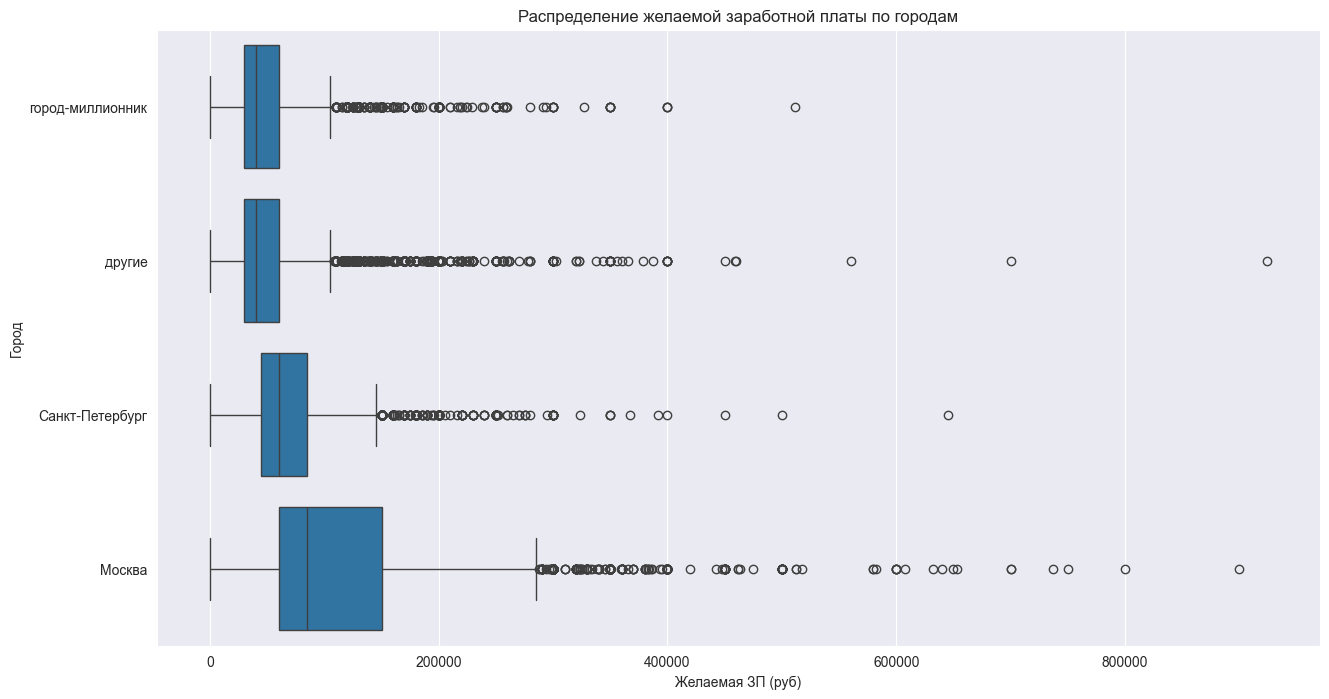

,median,min,max
Город,,,
город-миллионник,40000.0,1.0,511681.6
другие,40000.0,1.0,923983.0
Санкт-Петербург,60000.0,1.0,645171.0
Москва,85000.0,1.0,900000.0


In [21]:
# ваш код здесь

# Группировка по городам и расчет медианной зарплаты и диапазона
salary_stats_by_city = filtered_data.groupby('Город')['ЗП (руб)'].agg(['median', 'min', 'max']).sort_values(by='median')

plt.figure(figsize=(15, 8))
sns.boxplot(x='ЗП (руб)', y='Город', data=filtered_data, order=salary_stats_by_city.index)
plt.title('Распределение желаемой заработной платы по городам')
plt.xlabel('Желаемая ЗП (руб)')
plt.ylabel('Город')
plt.show()

salary_stats_by_city


ваши выводы здесь

Медианные уровни желаемой заработной платы и их размах варьируются в зависимости от города. В Москве наблюдается самый высокий медианный уровень заработной платы, за ней следует Санкт-Петербург, а в городах-миллионниках и других городах медианные уровни заработной платы существенно ниже.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

<Figure size 1000x600 with 0 Axes>

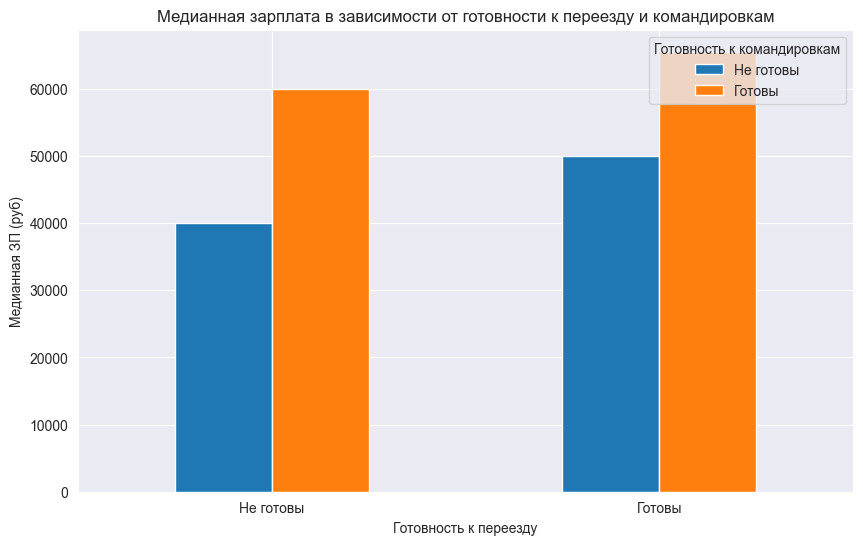

Готовность к командировкам,False,True
Готовность к переезду,,
False,40000.0,60000.0
True,50000.0,65535.0


In [22]:
# ваш код здесь

# Группировка данных по Готовность к переезду И Готовности к командировкам и расчет медианной зарплаты
salary_by_relocation_travel = filtered_data.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().unstack()


plt.figure(figsize=(10, 6))
salary_by_relocation_travel.plot(kind='bar', figsize=(10, 6))
plt.title('Медианная зарплата в зависимости от готовности к переезду и командировкам')
plt.xlabel('Готовность к переезду')
plt.ylabel('Медианная ЗП (руб)')
plt.xticks([0, 1], ['Не готовы', 'Готовы'], rotation=0)
plt.legend(title='Готовность к командировкам', labels=['Не готовы', 'Готовы'])
plt.show()

salary_by_relocation_travel

ваши выводы здесь

Соискатели, готовые к командировкам, в среднем указывают более высокую желаемую заработную плату, независимо от их готовности к переезду. Также интересно, что готовность к переезду (без учета командировок) не всегда связана с более высокими ожиданиями по зарплате.

Это может отражать рыночную тенденцию, где гибкость в командировках оценивается выше, чем готовность к переезду. Возможно, это связано с тем, что готовность к командировкам может быть связана с более высокими требованиями к квалификации и адаптивности.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

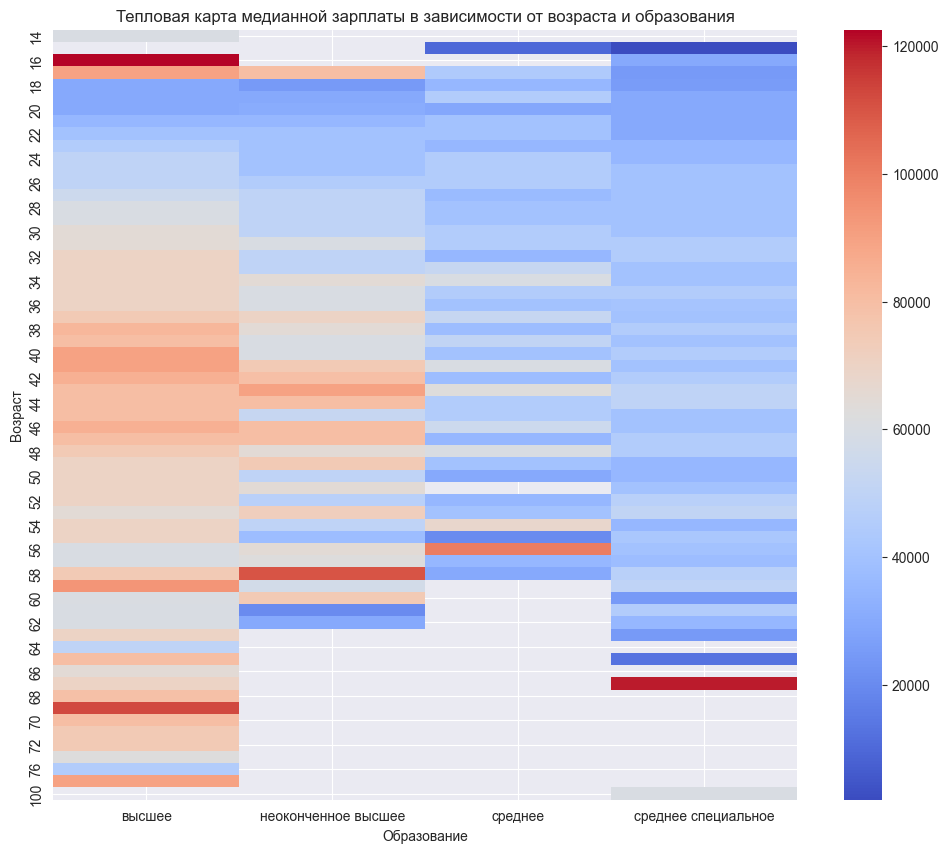

In [23]:
# ваш код здесь

pivot_salary_age_education = filtered_data.pivot_table(values='ЗП (руб)', index='Возраст', columns='Образование', aggfunc='median')

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_salary_age_education, fmt=".0f", cmap='coolwarm')
plt.title('Тепловая карта медианной зарплаты в зависимости от возраста и образования')
plt.xlabel('Образование')
plt.ylabel('Возраст')
plt.show()

ваши выводы здесь

Существует тенденция к увеличению медианных заработных плат с возрастом до определенного пика, после чего они начинают снижаться. Это может быть связано с пиком карьерного роста и накоплением опыта. Уровень образования также играет важную роль, при этом высшее образование в среднем связано с более высокими заработными платами.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

C:\Users\Grishin\AppData\Local\Temp\ipykernel_6648\1230512099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Опыт работы (год)'] = filtered_data['Опыт работы (месяц)'] / 12


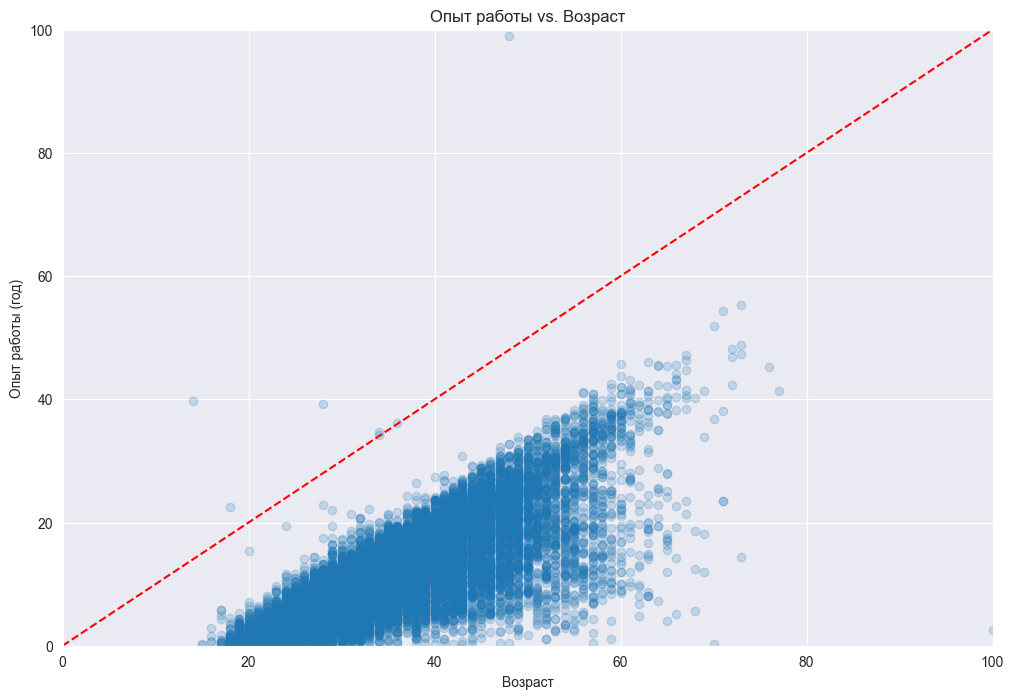

In [24]:
# ваш код здесь

filtered_data['Опыт работы (год)'] = filtered_data['Опыт работы (месяц)'] / 12

# Plotting the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(filtered_data['Возраст'], filtered_data['Опыт работы (год)'], alpha=0.2)
plt.title('Опыт работы vs. Возраст')
plt.xlabel('Возраст')
plt.ylabel('Опыт работы (год)')

x = np.array([0, 100])
plt.plot(x, x, color='red', linestyle='--')

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

ваши выводы здесь

Большинство точек сосредоточены в диапазоне возраста от 20 до 60 лет и опыта работы от 0 до 40 лет.
Есть линейная зависимость, где с увеличением возраста увеличивается и опыт работы.
Точки, лежащие на красной линии и выше, указывают на аномалии. Это могут быть случаи, где заявленный опыт работы нереалистично высок по отношению к возрасту соискателя.
(Например, если человеку 30 лет и он указывает 30 лет опыта работы)

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


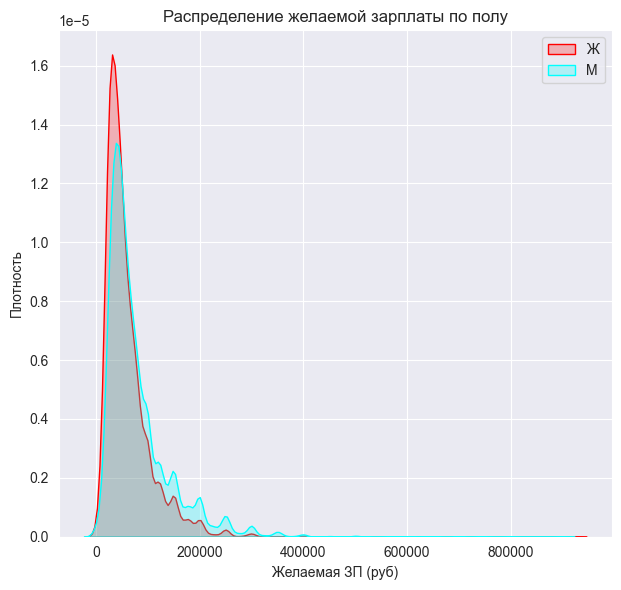

In [25]:
# ваш код здесь

# 1. Распределение желаемой зарплаты по полу
salary_by_gender = filtered_data.groupby('Пол')['ЗП (руб)']
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for gender, data in salary_by_gender:
    sns.kdeplot(data, label=gender, color='red' if gender == 'Ж' else 'cyan', fill=True)
plt.title('Распределение желаемой зарплаты по полу')
plt.xlabel('Желаемая ЗП (руб)')
plt.ylabel('Плотность')
plt.legend()


plt.tight_layout()
plt.show()

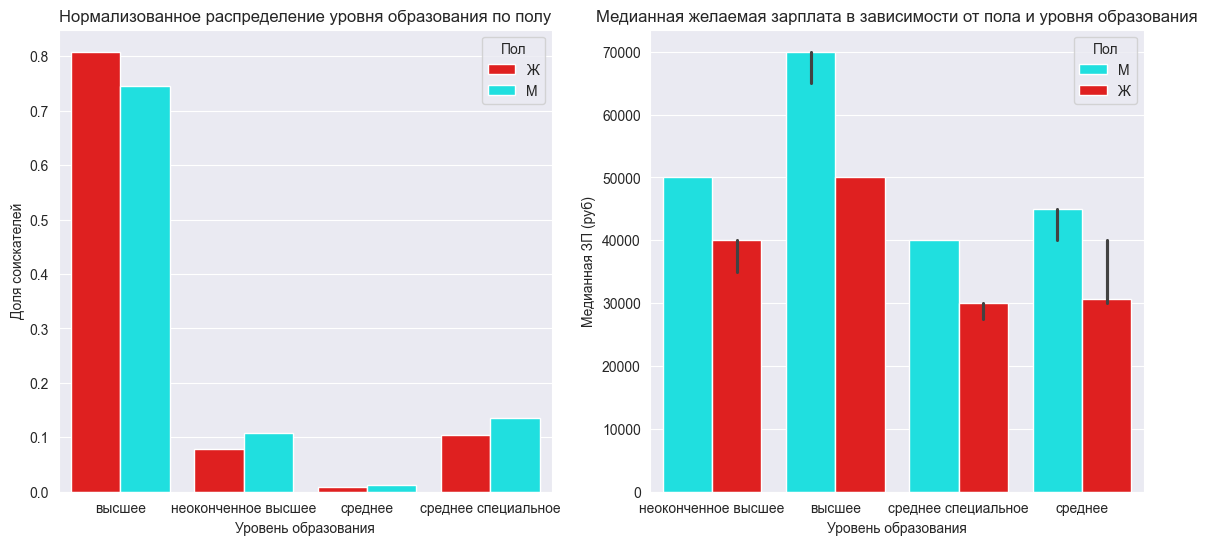

In [26]:
education_counts = (df.groupby(['Образование', 'Пол'])
                    .size()
                    .unstack(fill_value=0))
normalized_education = education_counts.div(education_counts.sum(axis=0), axis=1)


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=normalized_education.reset_index().melt(id_vars='Образование', value_vars=normalized_education.columns),
            x='Образование', y='value', hue='Пол', palette={'М': 'cyan', 'Ж': 'red'})
plt.title('Нормализованное распределение уровня образования по полу')
plt.xlabel('Уровень образования')
plt.ylabel('Доля соискателей')
plt.legend(title='Пол')

# Plot: Distribution of Desired Salary by Gender and Education Level
plt.subplot(1, 2, 2)
sns.barplot(x='Образование', y='ЗП (руб)', hue='Пол', data=filtered_data, estimator=np.median, palette={'М': 'cyan', 'Ж': 'red'})
plt.title('Медианная желаемая зарплата в зависимости от пола и уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Медианная ЗП (руб)')
plt.legend(title='Пол')

plt.show()

ваши выводы здесь

Образование и Заработная Плата:

Во всех категориях образования медианная желаемая заработная плата у мужчин выше, чем у женщин.
Наибольший разрыв в зарплатных ожиданиях наблюдается среди соискателей с высшим образованием.
Влияние Пола:

Пол является значительным фактором в определении ожидаемой заработной платы, причем мужчины в среднем указывают более высокие зарплатные ожидания по сравнению с женщинами в каждой категории образования.
Разрыв в Заработной Плате:

Разрыв в заработной плате между мужчинами и женщинами может указывать на гендерные различия в оценке своих профессиональных качеств и ожиданий относительно компенсации, что отражает более широкие социальные и экономические тенденции.

Стоит учесть, что в датасете женщин меньше примерно в 4.5 раза чем мужчин, следовательно, эти выводы могут быть неверны из-за недостатка данных.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [27]:
# ваш код здесь

duplicates = df.duplicated(keep='first')
df = df[~duplicates]

num_duplicates = duplicates.sum()

num_duplicates, df.shape

(155, (44589, 24))

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [28]:
# ваш код здесь
missing_values = df.isnull().sum()

missing_values

Ищет работу на должность:            0
Опыт работы                        166
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [29]:
# ваш код здесь

df = df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

median_experience = df['Опыт работы (месяц)'].median()
df['Опыт работы (месяц)'].fillna(median_experience, inplace=True)
missing_values_after_cleaning = df.isnull().sum()
print(df.shape)
missing_values_after_cleaning

(44587, 24)


Ищет работу на должность:            0
Опыт работы                        166
Последнее/нынешнее место работы      0
Последняя/нынешняя должность         0
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                  0
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удаленная работа                     0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [30]:
# ваш код здесь

# Removing resumes with salary higher than 1 million rubles or lower than 1 thousand rubles
df = df[(df['ЗП (руб)'] <= 1000000) & (df['ЗП (руб)'] >= 1000)]

# Displaying the shape of the new dataframe after filtering
df.shape

(44498, 24)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [31]:
# ваш код здесь

# Converting work experience from months to years for comparison
df['Опыт работы (год)'] = df['Опыт работы (месяц)'] / 12
# Finding and removing resumes where work experience in years exceeds the age of the applicant
df = df[df['Опыт работы (год)'] <= df['Возраст']]

# Displaying the shape of the new dataframe after removing such resumes
df.shape


(44491, 25)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

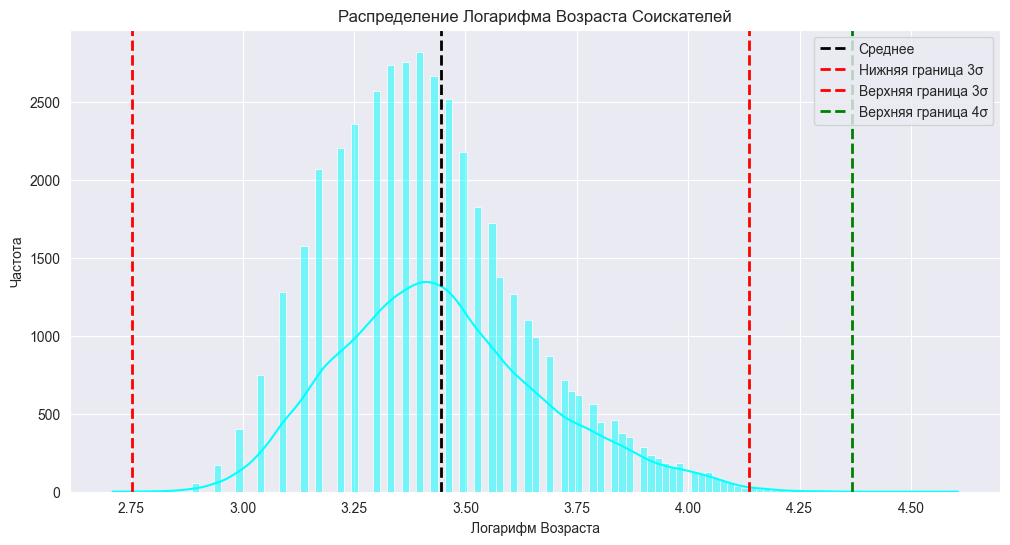

,Возраст,log_age,z_score
31137,15,2.70805,-3.186311
32950,15,2.70805,-3.186311
33654,100,4.60517,5.027509


In [32]:
from scipy.stats import zscore

# Логарифмическое преобразование возраста
df['log_age'] = np.log(df['Возраст'])

# Расчет среднего, стандартного отклонения и границ интервала метода трех сигм
mean_log_age = df['log_age'].mean()
std_log_age = df['log_age'].std()
lower_bound = mean_log_age - 3 * std_log_age
upper_bound = mean_log_age + 3 * std_log_age

# Расчет границ с учетом 4 сигм для правой стороны
upper_bound_4sigma = mean_log_age + 4 * std_log_age

# Определение выбросов с помощью z-отклонения
df['z_score'] = zscore(df['log_age'])
outliers = df[(df['z_score'] > 4) | (df['z_score'] < -3)]  # Выбросы с учетом 4 сигм вправо и 3 влево

# Построение графика распределения
plt.figure(figsize=(12, 6))
sns.histplot(df['log_age'], kde=True, color="cyan")
plt.axvline(mean_log_age, color='k', linestyle='--', lw=2, label='Среднее')
plt.axvline(lower_bound, color='r', linestyle='--', lw=2, label='Нижняя граница 3σ')
plt.axvline(upper_bound, color='r', linestyle='--', lw=2, label='Верхняя граница 3σ')
plt.axvline(upper_bound_4sigma, color='g', linestyle='--', lw=2, label='Верхняя граница 4σ')
plt.xlabel('Логарифм Возраста')
plt.ylabel('Частота')
plt.title('Распределение Логарифма Возраста Соискателей')
plt.legend()
plt.show()

# Вывод таблицы с выбросами
outliers[['Возраст', 'log_age', 'z_score']]


ваш коммментарий здесь

На основании z-отклонения были обнаружены следующие выбросы:

- Возраст 15 лет (логарифм возраста 2.71, z-значение -3.18) – в двух случаях
- Возраст 100 лет (логарифм возраста 4.61, z-значение 5.02)

Эти выбросы являются кандидатами для удаления из анализа, так как они сильно отклоняются от остальной части данных.
Учитывая контекст(возраст людей из вакансий на hh.ru в РФ) можно сказать, что соискатели с возрастом 15 лет нельзя считать выбросом.
Из этого стоит сделать вывод, что автоматизированные методы поиска аномалий могут дать хороший результат, но в любом случае стоит учитывать контекст и логику данных.

In [33]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Извлекаем данные о возрасте
#cleaned_data = df.dropna(subset=['Опыт работы (месяц)'])

ages = df[['Возраст']].copy()
#ages.drop(index=[6931, 39191], inplace=True)
# Нормализация данных перед применением DBSCAN
scaler = StandardScaler()
ages_scaled = scaler.fit_transform(ages)

# Isolation Forest
iso_forest = IsolationForest(contamination=0.001) # предполагаемый уровень аномалий в данных
ages['anomaly_iso'] = iso_forest.fit_predict(ages)

# DBSCAN
dbscan = DBSCAN(eps=0.25, min_samples=5)
ages['anomaly_dbscan'] = dbscan.fit_predict(ages_scaled)

# Определение аномалий
anomalies_iso = ages[ages['anomaly_iso'] == -1]
anomalies_dbscan = ages[ages['anomaly_dbscan'] == -1]

anomalies_iso_count = anomalies_iso.shape[0]
anomalies_dbscan_count = anomalies_dbscan.shape[0]

anomalies_iso_count, anomalies_iso


(44,
        Возраст  anomaly_iso  anomaly_dbscan
 152         72           -1               0
 850         71           -1               0
 2106        68           -1               0
 3293        73           -1               0
 3460        66           -1               0
 5597        77           -1              -1
 5780        66           -1               0
 6929        71           -1               0
 8390        67           -1               0
 10044       71           -1               0
 10075       69           -1               0
 10773       67           -1               0
 10778       69           -1               0
 10907       73           -1               0
 11070       66           -1               0
 11444       72           -1               0
 12424       69           -1               0
 12737       67           -1               0
 13321       66           -1               0
 15419       76           -1              -1
 16040       70           -1               0
 1962

In [34]:
anomalies_dbscan

,Возраст,anomaly_iso,anomaly_dbscan
5597,77,-1,-1
15419,76,-1,-1
33654,100,-1,-1


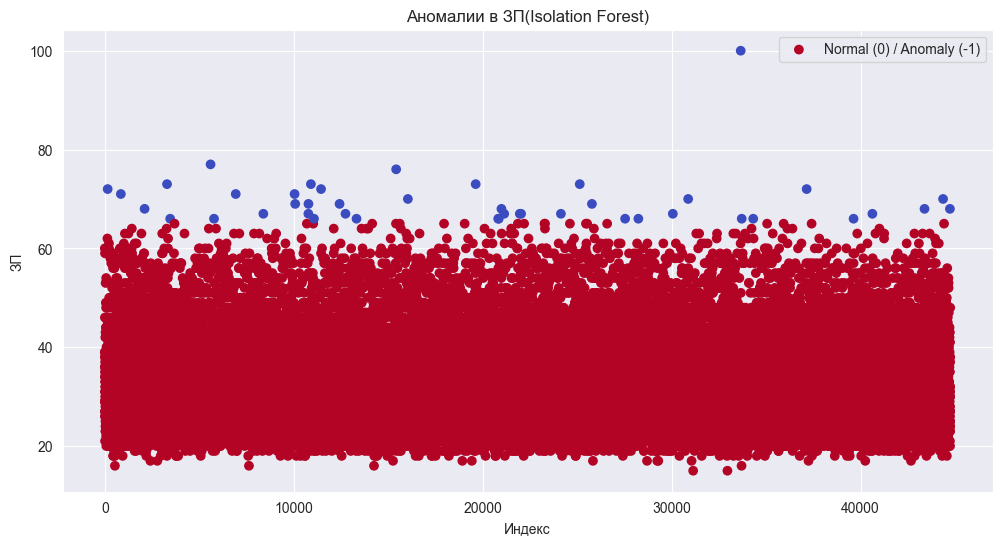

In [35]:
plt.figure(figsize=(12, 6))
plt.scatter(ages.index, ages['Возраст'], c=ages['anomaly_iso'], cmap='coolwarm', label='Normal (0) / Anomaly (-1)')
plt.title('Аномалии в ЗП(Isolation Forest)')
plt.xlabel('Индекс')
plt.ylabel('ЗП')
plt.legend()
plt.show()

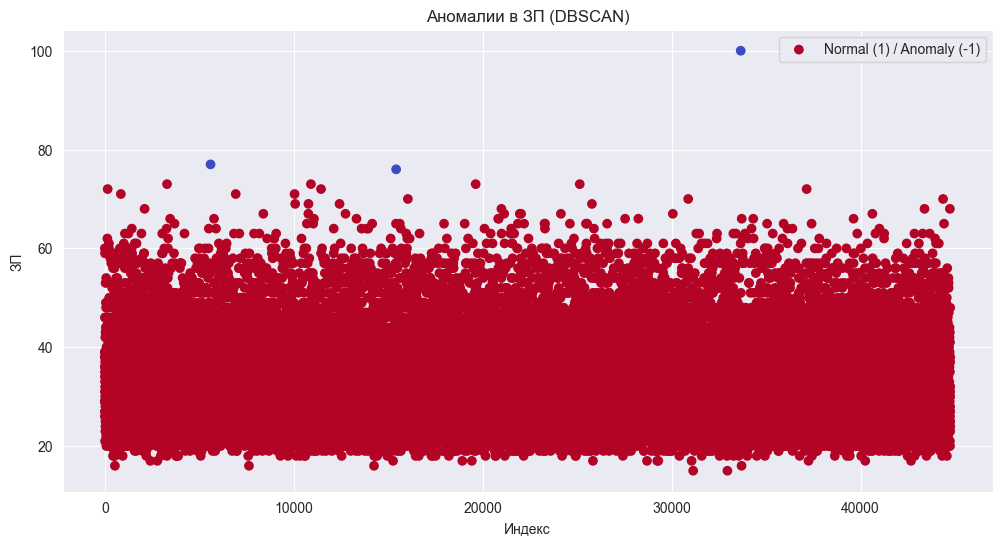

In [36]:
plt.figure(figsize=(12, 6))
plt.scatter(ages.index, ages['Возраст'], c=ages['anomaly_dbscan'], cmap='coolwarm', label='Normal (1) / Anomaly (-1)')
plt.title('Аномалии в ЗП (DBSCAN)')
plt.xlabel('Индекс')
plt.ylabel('ЗП')
plt.legend()
plt.show()